In [46]:
import networkx as nx
from networkx.algorithms import bipartite 
print('networkx: %s' % nx.__version__)
import pandas
print('pandas: %s' % pandas.__version__)

networkx: 1.11
pandas: 0.20.1


In [47]:
df = pandas.read_csv('OriginalDatasetDS.csv', sep=',', header=None, error_bad_lines=False, 
                     warn_bad_lines=True, low_memory=False)
pandas.options.display.max_columns = 22 
print(df.sample(n=10))

     0    1   2   3   4   5   6   7   8  9  10 ...  12  13  14 15 16  17  18  \
52    3   52   1   3   0   2   2   0   0  4  0 ...   1   0   0  3  2   0   0   
32    3   32   2   3   0   0   0   0   0  3  0 ...   2   0   4  0  0   0   0   
1     0    1   4   5   0   0   1   1   0  5  0 ...   4   0   0  2  0   1   3   
24    1   24   3   4   0   1   1   1   0  1  0 ...   4   0   0  5  0   3   0   
111   8  111   3   4   0   0   1   1   0  5  0 ...   0   0   0  1  4   0   2   
80    4   80   3   3   0   0   0   1   0  2  1 ...   3   0   0  5  4   0   0   
20    1   20   2   3   0   0   0   0   0  3  0 ...   1   0   0  4  0   5   0   
2     0    2   4   5   1   1   1   1   0  2  0 ...   0   0   0  1  0   0   3   
29    2   29   2   4   0   0   0   1   2  1  3 ...   1   2   3  0  0   1   0   
6     0    6   1   4   1   0   0   0   0  4  5 ...   1   0   0  0  0   0   0   

    19  20  21  22  
52   0   0   0   0  
32   0   0   0   0  
1    0   0   0   0  
24   0   0   0   0  
111  3   0   0

In [76]:
#df stands for dataframe
df.columns = ['Account Manager Identification Number','Customer Identification Number',
 'Innovative','Relationship Rating',
 'Visited Tech Center','ALPHA','BETA','PILOT','have they done pilot with us',
 'Improve occupancy via differentiation/positioning',
 'Increase rate/bed through add-on services','Increase 5-star rating',
 'Staff efficiency / lower cost of delivering care','Insurance costs',
 'Utilities costs','Health & Wellness Clinical Rehab',
 'Resident monitoring and saftey','Rehospitalization/ACo partnerships',
 'Care coordination across settings','Food & Nutirition', 
 'Telehealth and remote care delivery', 'Rural health and wellness', 'Pilots in Progress'] 
print("Example values:\n")
print(df.iloc[20]);
#A = df.column['Account Manager Identification Number']
# df.ix stands for the index of the dataframe, so like df.ix[2] could be second column(????)
#jk ix is archaic so you're supposed to use loc or iloc for location...but this is only for
#the row, not a column

A = df.columns['Account Manager Identification Number']
C = df.loc[101]
print(df.column['Account Manager Identification Number'])

Example values:

Account Manager Identification Number                 1
Customer Identification Number                       20
Innovative                                            2
Relationship Rating                                   3
Visited Tech Center                                   0
ALPHA                                                 0
BETA                                                  0
PILOT                                                 0
have they done pilot with us                          0
Improve occupancy via differentiation/positioning     3
Increase rate/bed through add-on services             0
Increase 5-star rating                                2
Staff efficiency / lower cost of delivering care      1
Insurance costs                                       0
Utilities costs                                       0
Health & Wellness Clinical Rehab                      4
Resident monitoring and saftey                        0
Rehospitalization/ACo partnersh

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices



Innovative Rankings, number of customers

1    44
3    39
2    34
4    29
5    14
Name: Innovative, dtype: int64


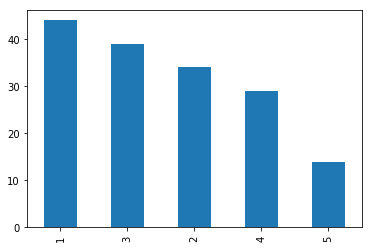

In [49]:
%matplotlib inline
print("\n\nInnovative Rankings, number of customers\n")
#using pandas
print(df['Innovative'].value_counts())
df['Innovative'].value_counts().plot(kind='bar')

In [51]:
B = nx.Graph()
B.add_nodes_from(df['Innovative'], bipartite=0) 
#the graph() class represents a bipartite graph because networkx doesn't have it's own bipartite class

In [52]:
B.add_nodes_from(df['Relationship Rating'], bipartite=1)
#B.add_edges_from([(1,'a'), (1,'b'),(2,'b'), (2,'c'), (3,'c'), (4,'a')])
#algorithms of bipartite module require a container of nodes as an argument
#bipartite graph is B
#0 or 1 as the "bipartite" attribute of the node shows on which side of the graph that node belongs

In [67]:
nx.is_connected(B)

False

In [55]:
bottom_nodes, top_nodes = bipartite.sets(B)
#B.remove_edge(2,'c')
nx.is_connected(B)

False

In [56]:
bottom_nodes, top_nodes = bipartite.sets(B)

In [58]:
#top_nodes = set(n for n,d in B.nodes(data=True) if d['bipartite'==0])
#bottom_nodes = set(B) - top_nodes

In [59]:
print(round(bipartite.density(B, bottom_nodes),2))
G = bipartite.projected_graph(B, top_nodes)
G.edges()

0.0


[]

In [23]:
#RB = bipartite.random_graph(5, 7, 0.2)
#RB_top = set(n for n,d in RB.nodes(data=True) if d['bipartite'==0])
#RB_bottom = set(RB) - RB_top
#list(RB_top)
#list(RB_bottom)

In [60]:
#Section on Matching!!!!!! Could be run as a separate notebook
#import networkx as nx
G = nx.complete_bipartite_graph(2,3)
left, right = nx.bipartite.sets(G)
list(left)

[0, 1]

In [61]:
list(right)

[2, 3, 4]

In [62]:
nx.bipartite.maximum_matching(G)

{0: 2, 1: 3, 2: 0, 3: 1}

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


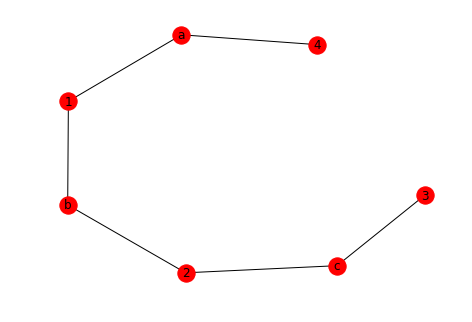

In [38]:
#nx.bipartite.random_graph(5, 7, 0)
nx.draw(B, with_labels = True)

In [ ]:
#clustering(G[, nodes, model]) 
        #Compute a bipartite clustering coefficient for nodes
#average_clustering(G[, nodes, model]) 
        #Compute the average bipartite clustering coefficient
#latapy_clustering(G[, nodes, model]) 
        #Compute a bipartite clustering coefficient for nodes
#robins_alexander_clustering(G) 
        #Compute the bipartite clustering of G

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\Anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
D:\Anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


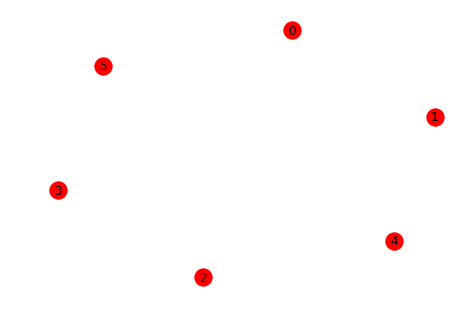

In [65]:
B.add_nodes_from(df['Innovative'], bipartite=1)
B.add_nodes_from(df['ALPHA'], bipartite=0)
nx.draw(B, with_labels = True) 